### Importo paquetes

In [1]:
import os
path = os.path.join(os.path.expanduser('~'), 'Documents/Proyectos/herramientas/')
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Definimos fuente para los graficos
font_dir = [path + 'Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Archivo'
font_manager.fontManager

### Cargo resultados

In [4]:
import json
f = open('data/results.json')
results_dict = json.load(f)
f = open('data/results_preprocessed.json')
results_preprocess_dict = json.load(f)

In [5]:
metric_names = ['accuracy', 'precision', 'f1', 'f1 macro', 'recall']

model_metrics = {}

for model_name in results_dict.keys():
    model_results = results_dict[model_name]
    model_metrics[model_name] = {}
    for metric_name in metric_names:
        metric_list = []
        for result in model_results:
            metric_list.append(result['eval_' + metric_name])
        model_metrics[model_name][metric_name] = metric_list

In [6]:
metric_names = ['accuracy', 'precision', 'f1', 'f1 macro', 'recall']

model_preprocess_metrics = {}

for model_name in results_preprocess_dict.keys():
    model_results = results_preprocess_dict[model_name]
    model_preprocess_metrics[model_name] = {}
    for metric_name in metric_names:
        metric_list = []
        for result in model_results:
            metric_list.append(result['eval_' + metric_name])
        model_preprocess_metrics[model_name][metric_name] = metric_list

### Grafico métricas

Beto y Roberta son a priori los mejores modelos. A excepción de en Recall, Roberta supera a Beto en todos los casos. Electra tiene métricas reiteradamente malas.

C:\Users\Pluvini\AppData\Local\Temp\ipykernel_18976\3381747933.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([x.capitalize() for x in models])
C:\Users\Pluvini\AppData\Local\Temp\ipykernel_18976\3381747933.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([x.capitalize() for x in models])


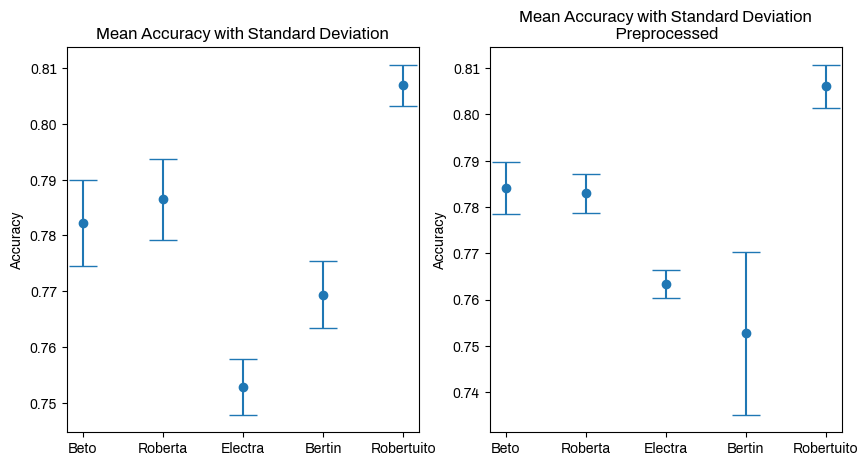

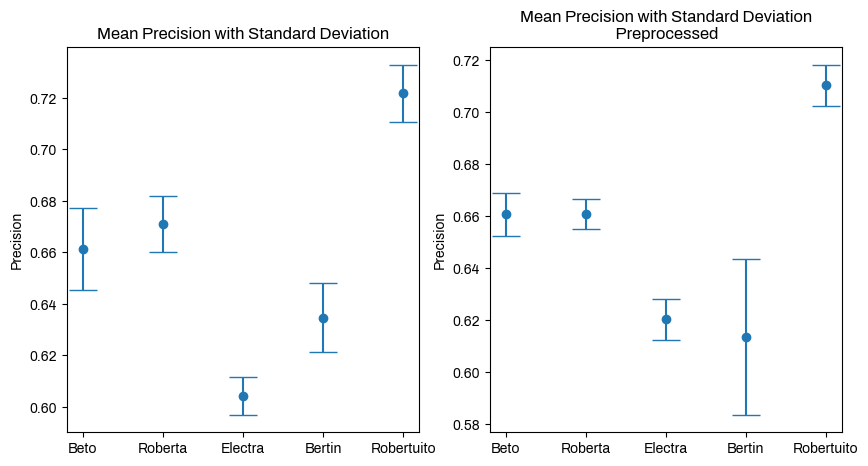

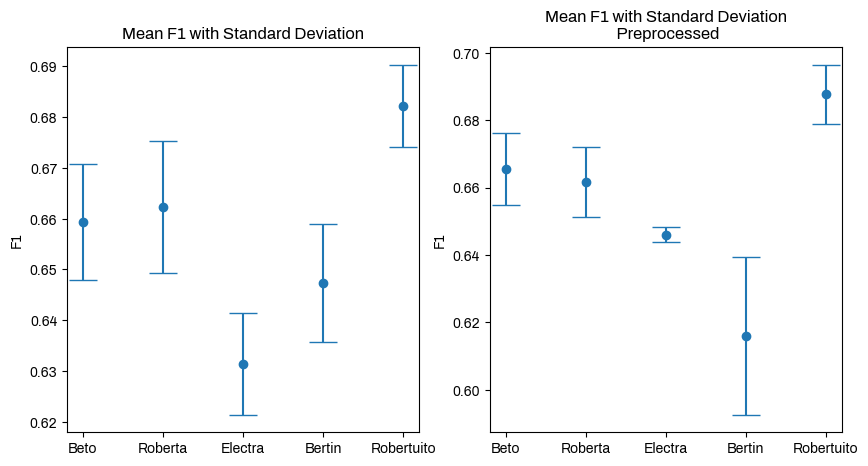

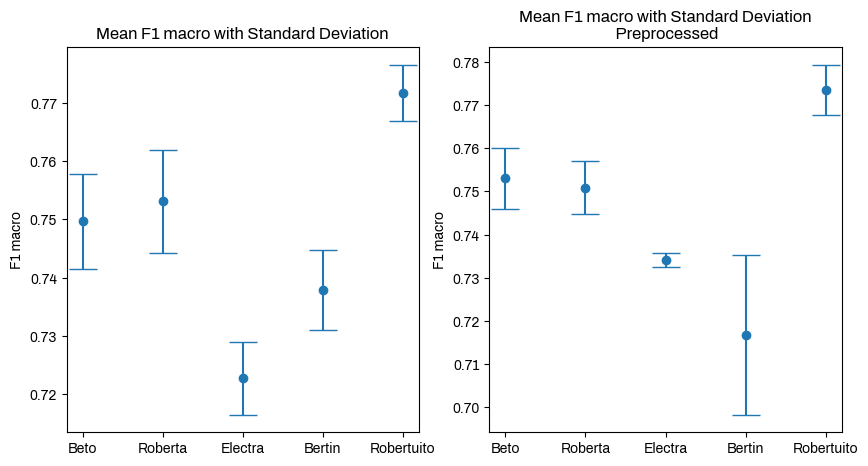

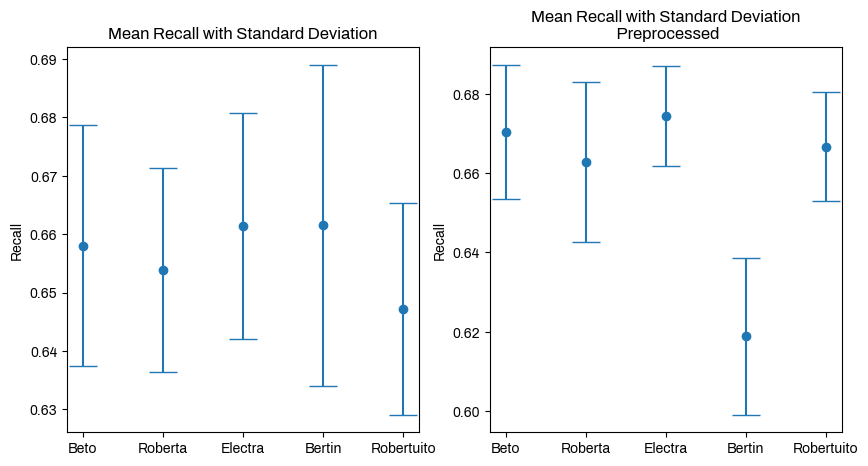

In [9]:
metrics = ['accuracy', 'precision', 'f1','f1 macro', 'recall']
models = ['beto', 'roberta', 'electra', 'bertin', 'robertuito']

for metric in metrics:
    fig, ax = plt.subplots(1,2,figsize=(10, 5))
    means = []
    stds = []
    for model in models:
        data = model_metrics[model][metric]
        mean = np.mean(data)
        std = np.std(data)
        means.append(mean)
        stds.append(std)
    ax[0].errorbar(x=models, y=means, yerr=stds, fmt='o', capsize=10)
    ax[0].set_xticklabels([x.capitalize() for x in models])
    ax[0].set_title(f"Mean {metric.capitalize()} with Standard Deviation")
    ax[0].set_ylabel(metric.capitalize())
    ax[0].xaxis.grid(False)
    means = []
    stds = []
    for model in models:
        data = model_preprocess_metrics[model][metric]
        mean = np.mean(data)
        std = np.std(data)
        means.append(mean)
        stds.append(std)
    ax[1].errorbar(x=models, y=means, yerr=stds, fmt='o', capsize=10)
    ax[1].set_xticklabels([x.capitalize() for x in models])
    ax[1].set_title(f"Mean {metric.capitalize()} with Standard Deviation\n Preprocessed")
    ax[1].set_ylabel(metric.capitalize())
    ax[1].xaxis.grid(False)
    plt.show()